# 03. Interpolation - Inverse of the distance

In this tutorial, we'll cover the interpolation of point data using the inverse of the distance methodology, available in PyMica as `id2d`. This methodology only requires location (`lon` and `lat`) and value to interpolate.

We'll use Meteorological Service of Catalonia sample data to demonstrate how to apply this interpolation technique. Therefore, we need to import the required modules. First, we need to load observation data and also the PyMica class.   

In [1]:
import json

from pymica.pymica import PyMica

Let's call the PyMica class with the appropriate parameters, setting the methodology to `id2d` and the configuration dictionary as follows:

In [2]:
config_file = 'sample-data/configuration_sample.json'

with open('sample-data/configuration_sample.json', 'r') as f_p:
    config = json.load(f_p)

config['id2d']

{'id_power': 2.5,
 'id_smoothing': 0.0,
 'interpolation_bounds': [260000, 4480000, 530000, 4750000],
 'resolution': 1000,
 'EPSG': 25831}

where:

- `id_power`: rate at which the influence of distant data points diminishes as we move away from them.
- `id_smoothing`: if 0.0 the interpolated value at that point location becomes identical to the observation value recorded at that precise data point.
- `interpolation_bounds`: [minimum_x_coordinate, minimum_y_coordinate, maximum_x_coordinate, maximum_y_coordinate]
- `resolution`: spatial resolution.
- `EPSG`: EPSG projection code.

With all these parameters and configurations set, let's initialize the `PyMica` class with the methodology set to 'id2d'.

In [3]:
id2d_method = PyMica(methodology='id2d', config=config_file)

/home/ecm/anaconda3/envs/pymica-test/lib/python3.10/site-packages/osgeo/osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Now that we have the interpolator set, we can input some data for interpolation. We will use data from the Meteorological Service of Catalonia AWS network.


In [4]:
with open('sample-data/data/smc_data.json', 'r') as f_p:
    data = json.load(f_p)

data[0]

{'id': 'C6',
 'value': 8.8,
 'lon': 0.9517200000000001,
 'lat': 41.6566,
 'altitude': 264.0,
 'dist': 0.8587308027349195}

As we can see, the first element of data meets the requirements of `PyMica` input data, so we only need to call the `interpolate` method from the interpolator class `id2d_method`.

In [5]:
data_field = id2d_method.interpolate(data)

Now, we can get a quick look of the `data_field` array using `matplotlib`.

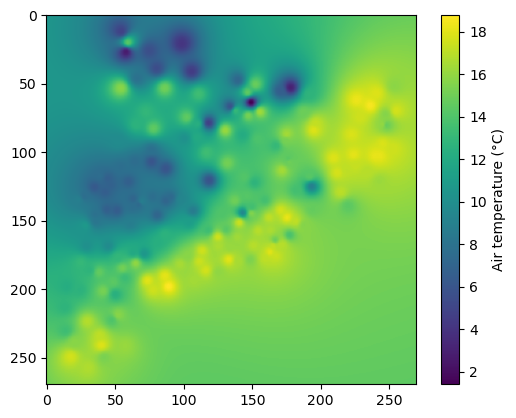

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data_field)
plt.colorbar(label='Air temperature (\u00b0C)')

Finally, we can save the result into a GeoTIFF file using `save_file()` from `PyMica` class.

In [7]:
id2d_method.save_file("sample-data/results/id2d.tif")

We have now completed this tutorial on how to interpolate station data using the `id2d` methodology.